In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import warnings

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/indian-food-classification/Food Classification",
    shuffle = True,
    image_size = (228,228) )
data_dir='../input/indian-food-classification/Food Classification'

In [ ]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [47]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = (228,228),
    batch_size =32,
    class_mode='categorical',
    subset = 'validation')

Found 5024 images belonging to 20 classes.
Found 1245 images belonging to 20 classes.


In [48]:
model=InceptionV3(weights='imagenet',include_top=False,input_shape=(228,228,3),pooling='avg')
for layer in model.layers:
    layer.trainable=False

In [49]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

In [50]:
input=model.output
input=BatchNormalization(axis=-1)(input)
input=Dense(1024,activation='relu')(input)
input=Dropout(0.3)(input)
output = Dense(20, activation='softmax')(input)
m = Model(inputs = model.input, outputs = output)
m.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [51]:
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 228, 228, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 113, 113, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_190 (Batch  (None, 113, 113, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [52]:
batch_size=32
his=m.fit_generator(train_data,
                    validation_data = val_data,
                    epochs = 5,
                    verbose = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
157/157 [==============================] - 270s 2s/step - loss: 1.9423 - accuracy: 0.5705 - val_loss: 0.8625 - val_accuracy: 0.7446
Epoch 2/5
157/157 [==============================] - 218s 1s/step - loss: 1.3406 - accuracy: 0.6843 - val_loss: 0.8592 - val_accuracy: 0.7783
Epoch 3/5
157/157 [==============================] - 217s 1s/step - loss: 1.1355 - accuracy: 0.7186 - val_loss: 0.7189 - val_accuracy: 0.8161
Epoch 4/5
157/157 [==============================] - 214s 1s/step - loss: 0.9905 - accuracy: 0.7398 - val_loss: 0.6542 - val_accuracy: 0.8177
Epoch 5/5
157/157 [==============================] - 217s 1s/step - loss: 0.8631 - accuracy: 0.7613 - val_loss: 0.6635 - val_accuracy: 0.8153


In [53]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']

loss = his.history['loss']
val_loss = his.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

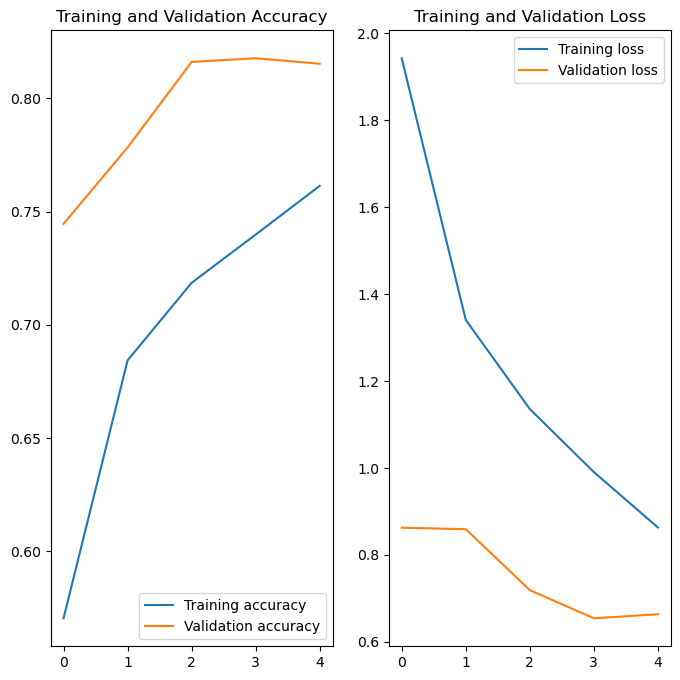

In [54]:
EPOCHS=5
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')